# Naive Bayes RepuestosWeb

## Librerías a utilizar

In [31]:
import pandas as pd
import numpy as np
import pyodbc
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
%matplotlib inline 

# Crear conexión a base de datos para consumir la vista


In [2]:
conexion = pyodbc.connect('Driver={SQL Server};'
                          'Server=LAPTOP-MHM32UUF;'
                          'Database=RepuestosWeb;'
                          'Trusted_Connection=yes;')

## Consumir vista VW_OrdenesEncimaPromedio

In [4]:
data = pd.read_sql('select * from VW_OrdenesEncimaPromedio',conexion)
data.head(10)

,NombreCiudad,Genero,ID_Parte,ID_Categoria,Total_Orden,TotalEncimaPromedio
0,Santa Ana,F,*221MISC,818,14082.30,1
1,Lincoln,M,*228MISC,978,12261.20,0
2,Albuquerque,F,*229MISC,274,19843.82,1
3,Oakland,F,*230MISC,292,17412.84,1
4,Los Angeles,M,*330MISC,633,15035.77,1
5,Rochester,M,*339MISC,470,14926.29,1
6,Raleigh,F,*412MISC,31,4065.47,0
7,St. Paul,F,*415CMISC,863,11277.00,0
8,Milwaukee,M,*415MISC,996,4792.05,0
9,Memphis,F,*415RMISC,678,12276.23,0


## Almacenar las variables X y Y por separado, variables dependientes e independientes

In [14]:
X = data.iloc[:, 0:5].values
Y = data.iloc[:, -1].values


## Categorizar campos no numéricos

In [21]:

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X

array([[79, 0, 0, 818, 14082.3],
       [44, 1, 1, 978, 12261.2],
       [1, 0, 2, 274, 19843.82],
       ...,
       [34, 1, 12892, 16233, 18117.74],
       [89, 1, 12893, 16233, 6084.49],
       [28, 1, 12894, 16233, 5196.98]], dtype=object)

## Separar datos de entrenamieto y de prueba 80/20 respectivamente

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## Crear modelo Naive Bayes

In [24]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

## Probar modelo con datos de prueba

In [25]:
Y_pred  =  classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## Generar matriz de confusión y precisión

In [27]:
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)

## Matriz de confusión

In [28]:
cm

array([[1304,    0],
       [   4, 1272]], dtype=int64)

## Precisión del modelo

In [29]:
ac

0.9984496124031008

## Graficar matriz de confusión

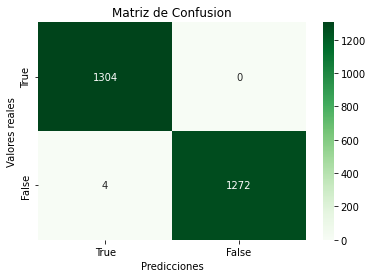

In [32]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); 
ax.set_title('Matriz de Confusion'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False']);